In [1]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import numpy as np
from htmresearch.support.cans.utils import *
from htmresearch.support.cans.basic_dynamics import *
%load_ext autoreload
%autoreload 2


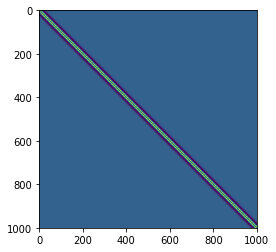

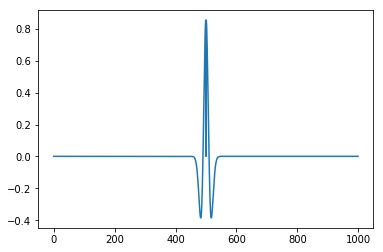

In [12]:


r = 100.
n = 1000


X = np.linspace(0.,r, num=n)


D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            D[i,j] = np.absolute(X[i] - X[j])

        
J = mexican_hat
# J = W_zero



W = create_W(J, D)

# W[W>0]=0.

plt.imshow(W)
plt.show()

plt.plot(W[500])
plt.show()

# tonic = - np.mean(W[:,:], axis=1)
# plt.plot(tonic)



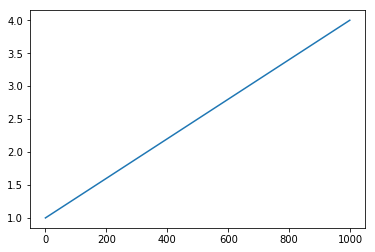

In [16]:
# beta_mask = 2 + np.linspace(0,2.,num=n) **2
beta_mask = np.linspace(1,4.,num=n)

# beta_mask = np.ones(n)*2.

plt.plot(beta_mask)
plt.show()


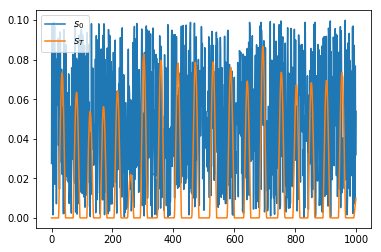

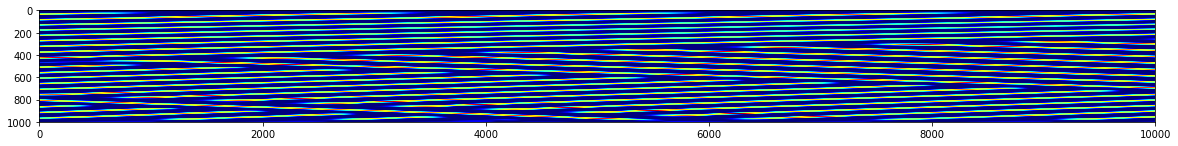

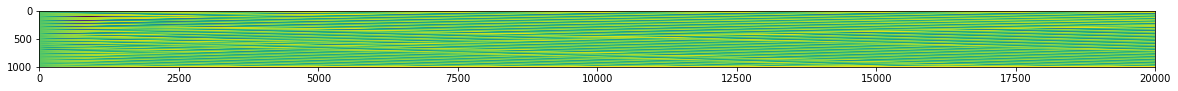

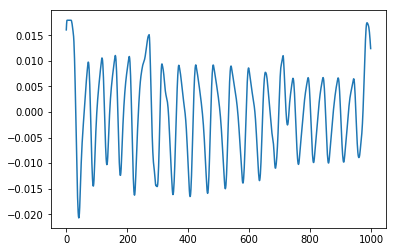

In [28]:
from htmresearch.support.gridcells.utils import cross_correlate
from scipy import ndimage
import numpy.fft as fft
from scipy.special import expit




T = 20000
X = np.linspace(0.2,0.4,num=T)

S = np.zeros((T,n))




S[0] = np.zeros(n)
# S[0] = bump(0.1, n)*0.01
S[0] = np.random.sample(n)*0.1

Beta = np.ones((T,n))*0.0





for t in range(1,T):
    
    s = S[t-1]
#     x = X[t-1]
#     b = bump(x, n)*0.1
    b = np.zeros(n)
    
    tonic = 0.
    beta  = Beta[t-1]

    
    s_ = evolve_step(W, b  + tonic, s, beta_mask*beta, mask=np.ones(n))  
    S[t]    = s_

#     Beta[t] = Beta[t-1] - (s_ - np.mean(s_))
    alpha = 0.001
    Beta[t] = (1. - alpha)*Beta[t-1] - alpha*(s_ - np.mean(s_))


plt.plot(S[0], label="$s_0$")
plt.plot(S[-1], label="$s_T$")
plt.legend()
plt.show()


plt.figure(figsize=(20,5))
plt.imshow(S[10000:].T, cmap="jet")
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(Beta.T )
plt.show()

plt.plot(Beta[-1])




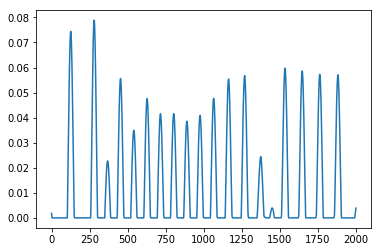

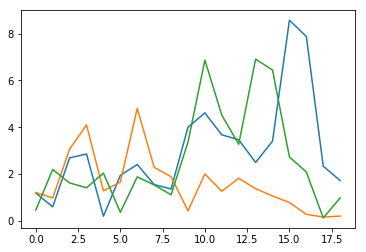

66


In [15]:
t = 9000
f = S[t,:][:]

mid1 = 600
mid2 = 650
g1 = S[t,:mid1][:]
g2 = S[t,mid2:][:]
# f = f - np.amin(f) 
# f = f/np.amax(f)

ff = np.absolute(np.fft.fft(f))
gg1 = np.absolute(np.fft.fft(g1))
gg2 = np.absolute(np.fft.fft(g2))
plt.plot(f)
plt.show()


plt.plot(ff[1:20])
plt.plot(gg1[1:20])
plt.plot(gg2[1:20])
plt.show()


print 1000/np.argmax(ff[1:20])


done


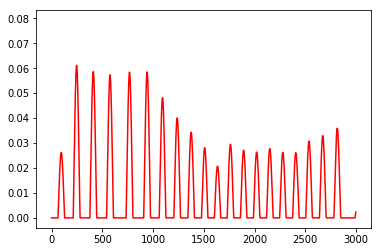

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_ydata(data[num,...])
    return line,


fig = plt.figure()

data = S[np.arange(5000,len(S), step=10)]

l, = plt.plot(np.arange(n), data[0], 'r-', animated=True)
ani = animation.FuncAnimation(fig, update_line, len(data), fargs=(data, l),
                                   interval=50, blit=True)

ani.save('moving_bumps_1-dim_.mp4')
print "done"
# plt.show()

40960000
